# KHÁM PHÁ DỮ LIỆU

In [1]:
# import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu từ file csv

df = pd.read_csv('data/mxmh_survey_results_clean.csv')
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
1,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
2,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
3,18,Spotify,5,Yes,Yes,Yes,Jazz,Yes,Yes,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
4,18,YouTube Music,3,Yes,Yes,No,Video game music,Yes,Yes,66,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,17,Spotify,2,Yes,Yes,No,Rock,Yes,Yes,120,...,Very frequently,Never,Rarely,Very frequently,Never,7,6,0,9,Improve
654,18,Spotify,1,Yes,Yes,No,Pop,Yes,Yes,160,...,Very frequently,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve
655,19,Other streaming service,6,Yes,No,Yes,Rap,Yes,No,120,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve
656,19,Spotify,5,Yes,Yes,No,Classical,No,No,170,...,Never,Never,Never,Never,Sometimes,2,3,2,1,Improve


In [3]:
df_copy=df.copy()
df_copy=df_copy.select_dtypes(include=['int64','float64'])
df_copy.aggregate(['min','max','mean','median','std','var'])


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
min,10.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,9.000000,194.000000,10.000000,10.000000,10.000000,10.000000
mean,25.057751,3.048632,122.185410,5.816109,4.740122,3.655015,2.607903
median,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
std,11.553054,2.025877,27.811810,2.774846,2.968265,3.048239,2.826500
var,133.473068,4.104176,773.496773,7.699771,8.810595,9.291763,7.989100


# Những câu hỏi để khám phá dữ liệu ?

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>1. Độ tuổi tham gia khảo sát là bao nhiêu ? Hãy vẽ biểu đồ histogram và chọn bins là bao nhiêu. Tại sao lại chọn bins như vậy?</b></font>



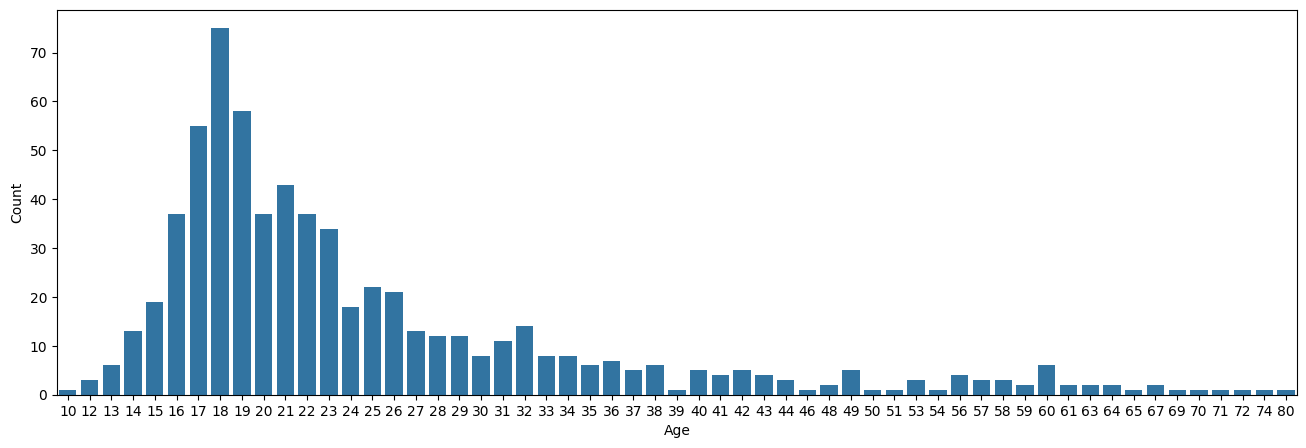

In [4]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df, x=df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: >

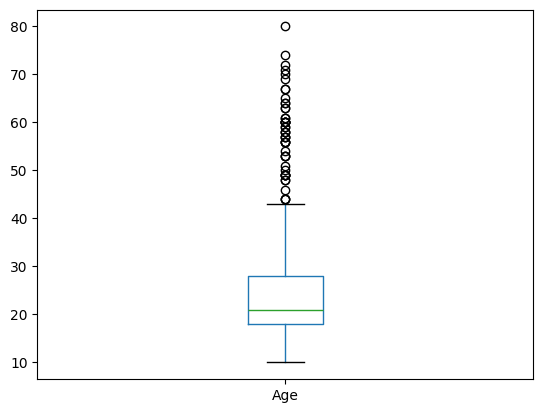

In [5]:
# Vẽ biểu đồ boxplot để miêu tả dữ liệu Age 
# print(df['Age'].describe().T)
df.boxplot(column=['Age'], grid=False)

- Dựa vào biểu đồ boxplot và histogram. Chúng ta có thể thấy đa phần độ tuổi tham gia khảo sát đều ở độ tuổi từ 18 đến 28 tuổi.
- Độ tuổi thấp nhất tham gia khảo sát là 10 tuổi và cao nhất là 58 tuổi.
- Độ tuôi trung bình tham gia khảo sát là 24 tuổi.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>2. Dịch vụ nghe nhạc nào được sử dụng nhiều bởi các đáp viên  </b></font>



</div>

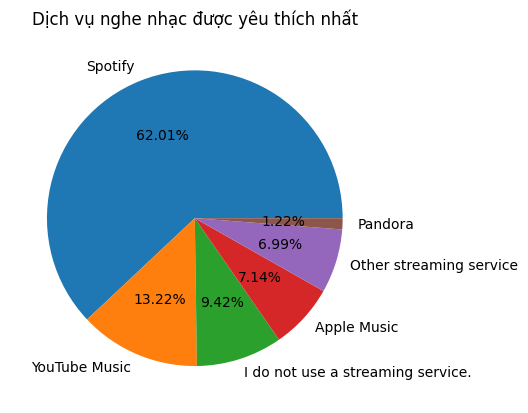

In [6]:
# Vẽ biểu đồ tròn để cho biết % của những dịch vụ nghe nhạc được yêu thích nhất 
# (Primary streaming service)
streaming_service = df['Primary streaming service'].value_counts()
plt.pie(streaming_service, labels=streaming_service.index, autopct='%.2f%%')
plt.title('Dịch vụ nghe nhạc được yêu thích nhất')
plt.show()

* Dịch vụ nghe nhạc của Spotify được nhiều người sử dụng nhất và chiếm phần lớn trong khảo sát với 62.01%
* Các dịch vụ nghe nhạc còn lại không chênh lệch nhiều, chỉ có Pandora là dịch vụ được sử dụng ít nhất, với 1.22%

- **Độ tuổi nghe nhạc trên các nền tảng là gì ? Trên mỗi nền tảng độ tuổi nghe nhạc có khác nhau không?**

C:\Users\ngnch\AppData\Local\Temp\ipykernel_35736\1277836147.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  streamyByAge = sns.boxplot(data=df, y="Primary streaming service", x = "Age",


Text(0.5, 1.0, 'Streaming services by Age')

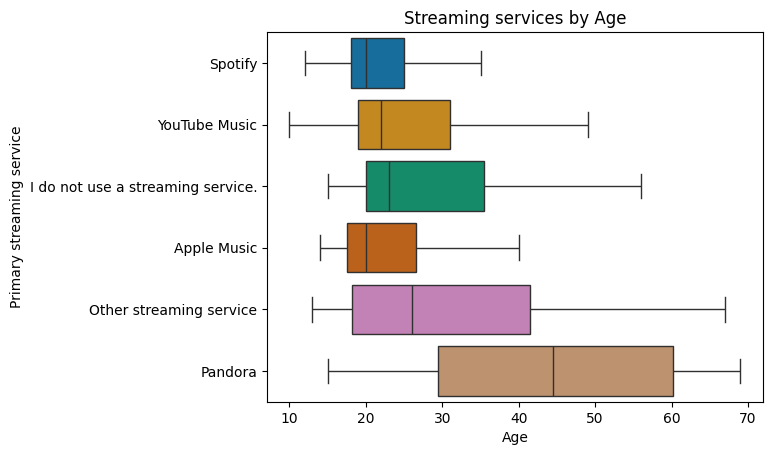

In [7]:
streamyByAge = sns.boxplot(data=df, y="Primary streaming service", x = "Age",
            showfliers = False,
            palette = "colorblind")

plt.yticks(rotation=0)
plt.title('Streaming services by Age')

* Nhìn chung ở các dịch vụ nghe nhạc đều không có sự chênh lệch về dộ tuổi, chỉ có những đáp viên dùng Pandora là có sự khác biệt rõ rệt với độ tuổi sử dụng là khá cao

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>3. Tìm hiểu số giờ nghe của người tham gia khảo sát ?  </b></font>



</div>

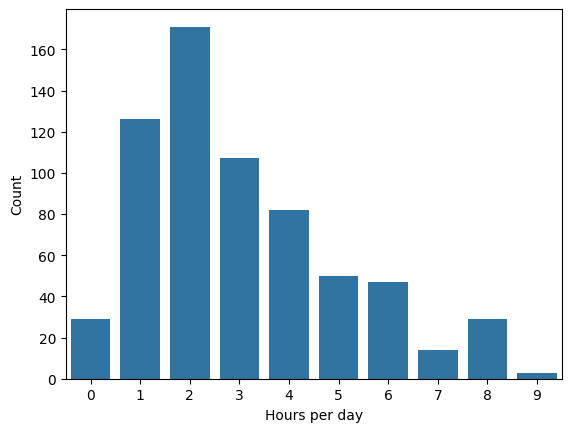

In [8]:
sns.countplot(data=df, x=df['Hours per day'])
plt.xlabel('Hours per day')
plt.ylabel('Count')
plt.show()

* Số giờ mà các đáp viên nghe nhạc nhiều nhất là 2 giờ, ít nhất là 9 giờ
* Số giờ có xu hướng giảm từ 3 giờ đến 9 giờ và từ 2 giờ dến 0 giờ

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>4. Sở thích về âm nhạc theo độ tuổi </b></font>

</div>

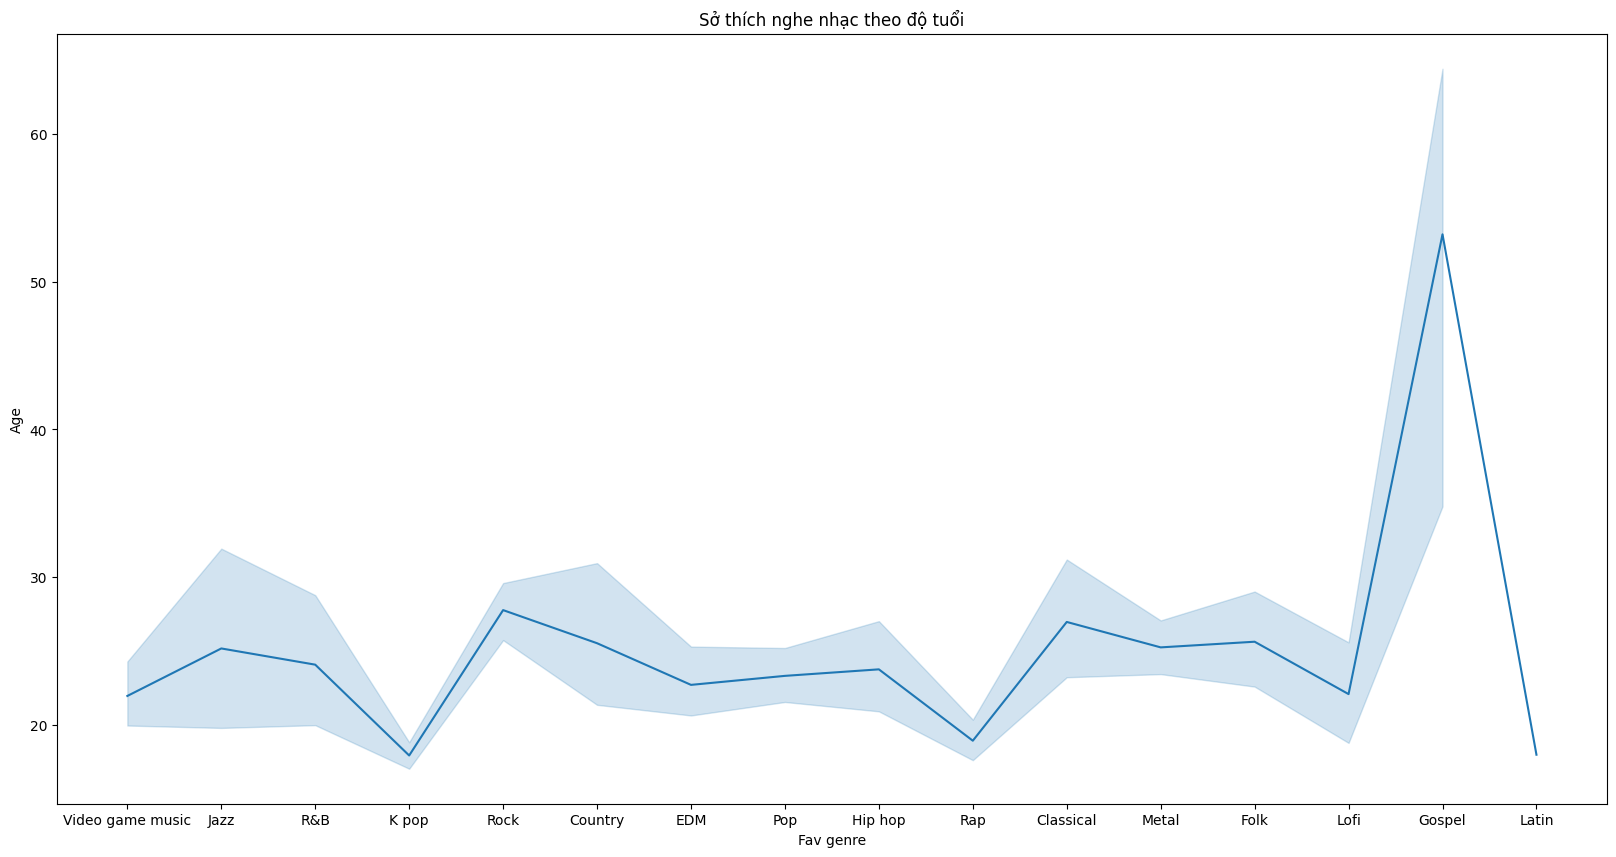

In [9]:
#Vẽ biểu đồ đường thể hiện xu hướng sở thích nghe nhạc theo độ tuổi
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="Fav genre", y="Age")
plt.title('Sở thích nghe nhạc theo độ tuổi')
plt.show()

* Nhạc Kpop, Rap và nhạc Latin được các đáp viên trẻ yêu thích nhiều nhất
* Đối với các đáp viên lớn tuổi thì là nhạc Gospel
* Các thể loại nhạc còn lại không có khác biệt nhiều

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>5. Mọi người có thường nghe nhạc được viết bằng một ngôn ngữ không phải ngôn ngữ chính của họ hay không? </b></font>

</div>

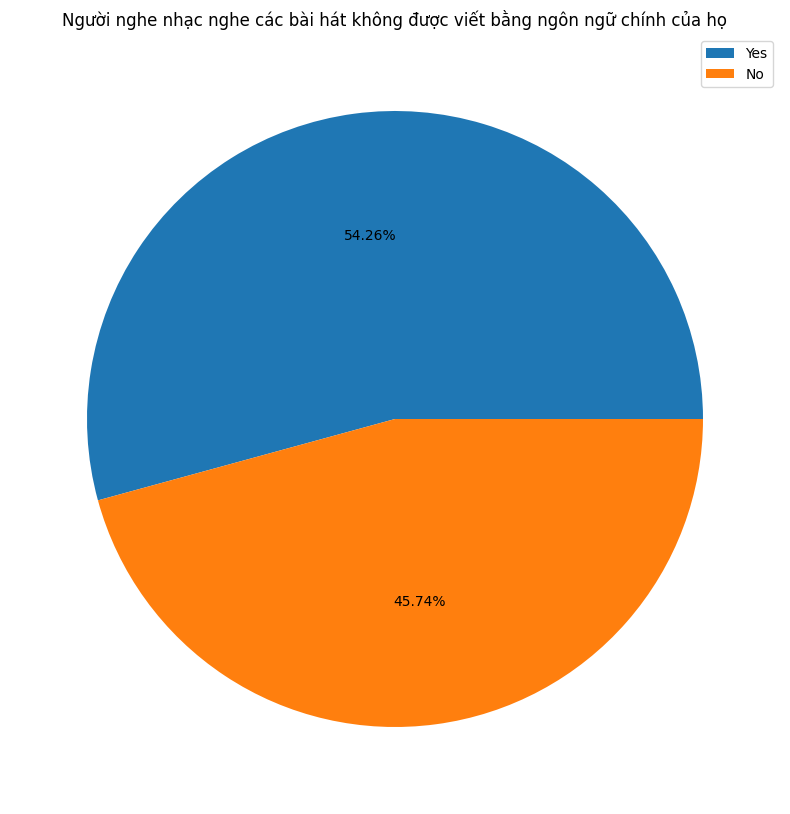

In [10]:
#Vẽ biểu đồ tròn thể hiện % người nghe nhạc nghe các bài hát không được viết bằng ngôn ngữ chính của họ
plt.figure(figsize=(20, 10))
size = df['Foreign languages'].value_counts(normalize=True)
label = ['Yes', 'No']
plt.pie(size, autopct='%.2f%%')
plt.legend(label, loc='best')
plt.title('Người nghe nhạc nghe các bài hát không được viết bằng ngôn ngữ chính của họ')
plt.show()

* Gần 46% những người tham gia khảo sát có nghe nhạc nước ngoài

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>6. Tần suất nghe nhạc của từng loại nhạc. </b></font>


</div>

In [11]:
frequency_df=df.copy()
frequency_df = frequency_df=df.copy().filter(regex='Frequency')
frequency_df.rename(columns=lambda x: x.replace('Frequency', ''), inplace=True)
frequency_df.rename(columns=lambda x: x.replace('[', '').replace(']', ''), inplace=True)
melted_df = frequency_df.melt()
melted_df.rename(columns=lambda x: x.replace('variable', 'Genres'), inplace=True)
pivot=melted_df.pivot_table(index='Genres', columns='value', aggfunc='size')
pivot

value,Never,Rarely,Sometimes,Very frequently
Genres,,,,
Classical,150,233,175,100
Country,302,213,98,45
EDM,276,175,130,77
Folk,261,200,128,69
Gospel,478,121,47,12
Hip hop,160,190,198,110
Jazz,230,228,155,45
K pop,377,156,60,65
Latin,396,152,82,28


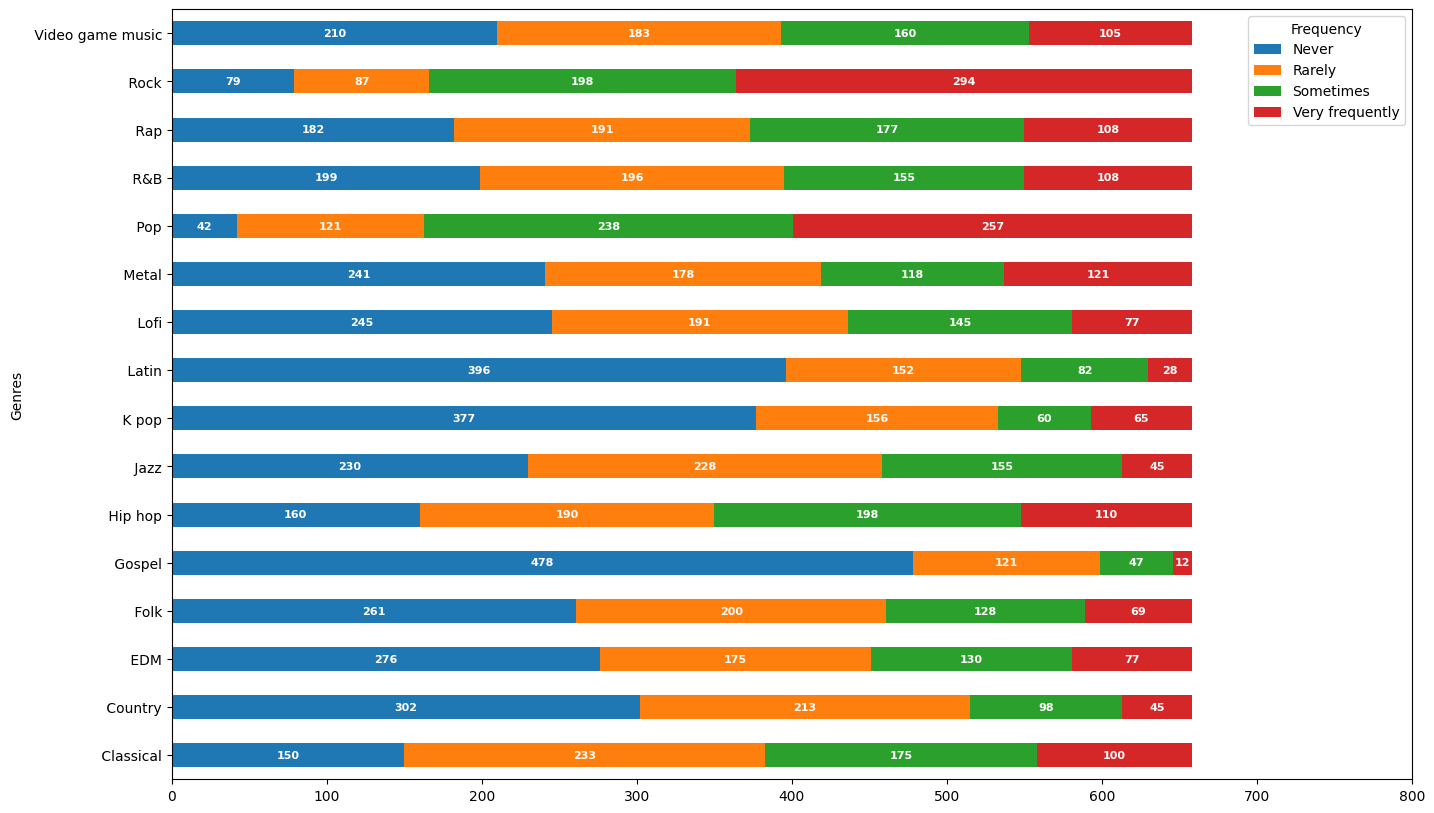

In [12]:
ax = pivot.plot(kind='barh', stacked=True, figsize=(16,10))


for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{int(width)}'
    label_x = x + width / 2
    label_y = y + height / 2

    if width > 0: 
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8, weight='bold', color='white')

plt.xlim(0,800)
plt.legend(title='Frequency', loc='upper right')
plt.show()

* Nhạc Rock là nhạc có số lượng nghe thường xuyên nhiều nhất, ít nhấy là Gospel
* Nhạc Gospel là nhạc có số người chưa bao giờ nghe là nhiều nhất, với nhạc Pop thì hầu như là ai cũng đã từng nghe

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>7. Việc nghe nhạc có cải thiện được sức khoẻ tinh thần không. </b></font>

</div>

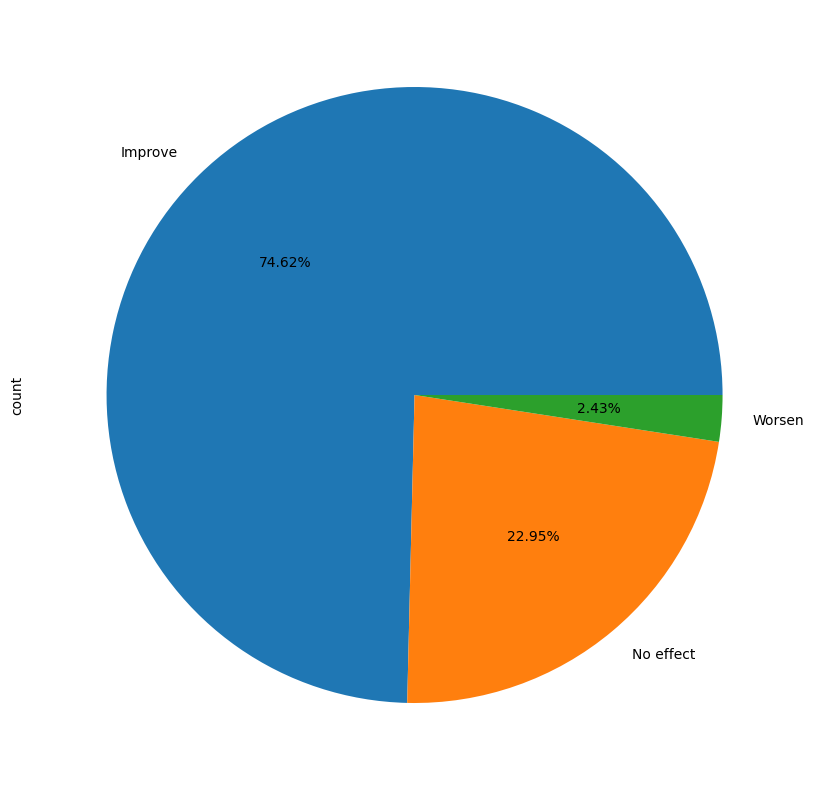

In [13]:
df['Music effects'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10, 10))
plt.show()

* Gần 3/4 số người tham gia khảo sát cho rằng việc nghe nhạc cải thiện được sức khoẻ tinh thần của họ
* Khoảng 23% cho biết rằng nghe nhạc không ảnh hưởng gì
* Và Có 2.43% những người tham gia khảo sát cảm thấy việc nghe nhạc đã làm cho tình trạng của họ tệ hơn

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>8. Mức độ bệnh của những người tham gia khảo sát. </b></font>


</div>

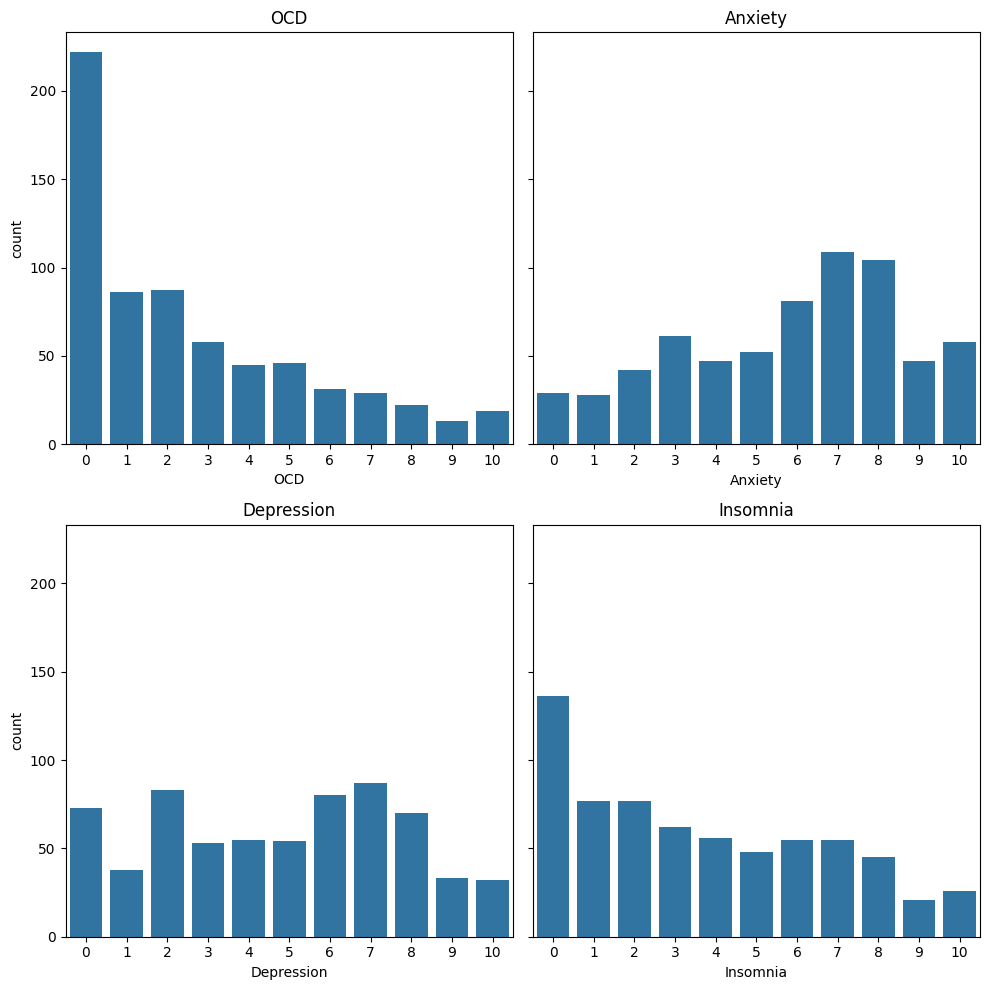

In [14]:
health_issues = ['OCD', 'Anxiety', 'Depression', 'Insomnia']
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

for i, health_issue in enumerate(health_issues):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=health_issue, ax=axs[row, col])  # Gọi countplot từ seaborn
    axs[row, col].set_title(health_issue)

plt.tight_layout()
plt.show()

* Hầu hết mọi người đều bị OCD và Mất ngủ ở mức nhẹ, và Lo lắng ở mức khá cao
* Mức độ trầm cảm được trải đều, cao nhất là ở mức 7

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>9. Độ tương quan giữa các cột numeric. </b></font>


</div>

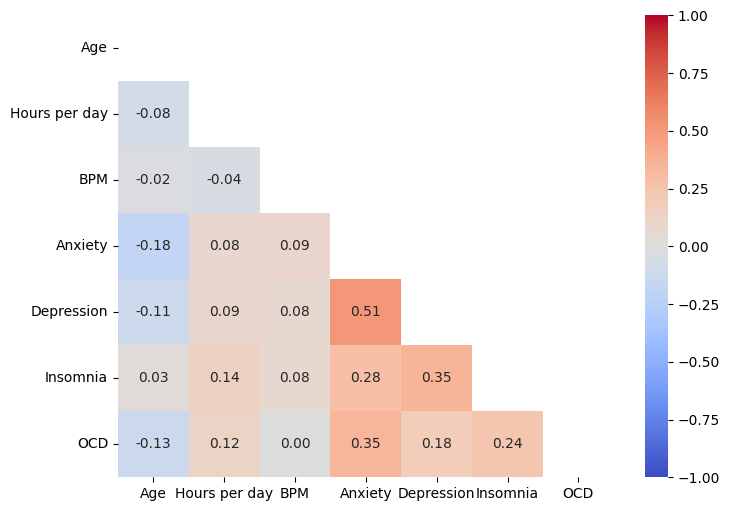

In [15]:
df_copy=df.copy()
df_copy = df_copy.select_dtypes(include=['int64','float64'])
corr = df_copy.corr()

matrix = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr,mask=matrix,vmin=-1, vmax=1,annot=True,fmt=".2f",cmap='coolwarm')

plt.show()

Dường như các cột số trong dữ liệu không có sự tương quan nào với nhau, chỉ số tương quan cao nhất là 0.51, và các chỉ số còn lại luôn rất thấp